# CROW - photontorch

## Imports

In [1]:
import torch
import numpy as np
import photontorch as pt
from photontorch_crow import PhotontorchCrow
import matplotlib.pyplot as plt

## Constants

In [2]:
num_wls = 100
device = "cuda"
wls = np.linspace(1.55,1.6, num_wls)
t = np.arange(3000)*2e-14

pt.set_environment(time=t, wavelength=wls)

## Time Domain

In [3]:
crow = PhotontorchCrow(
    num_rings=63,
    ring_length=50e-6,
    neff=2.86,
    ng=2.86,
).to(device).initialize()

with torch.no_grad():
    %time pt_det = crow(source=1)[:,0,:,0] # all timesteps, single wavelengths, all outputs, single batch

/home/flaport/Programming/Photontorch/photontorch/networks/network.py:640: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /opt/conda/conda-bld/pytorch_1596265861335/work/torch/csrc/utils/tensor_numpy.cpp:141.)
  device=self.device,


CPU times: user 9.63 s, sys: 6.81 s, total: 16.4 s
Wall time: 16.4 s


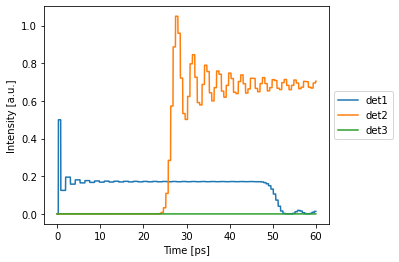

In [4]:
%matplotlib inline
crow.plot(pt_det);